# WEEK 2
## EXPERIMENTING WITH DEEP NEURAL NETWORKS

# ---------------------------------------------------------------------------------------------------------

# Name : Kartabya Krishna
# Date : 20230810
# Batch : B2

# ---------------------------------------------------------------------------------------------------------

#### Importing required libraries 

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

#### Importing the data

In [31]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Metadata of Churn Modelling Dataset

In [32]:
#Shape of the dataset
df.shape

(10000, 14)

In [33]:
#checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Pre-processing

In [35]:
len(df['Surname'].unique()), len(df['Geography'].unique())

(2932, 3)

In [36]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

<Axes: >

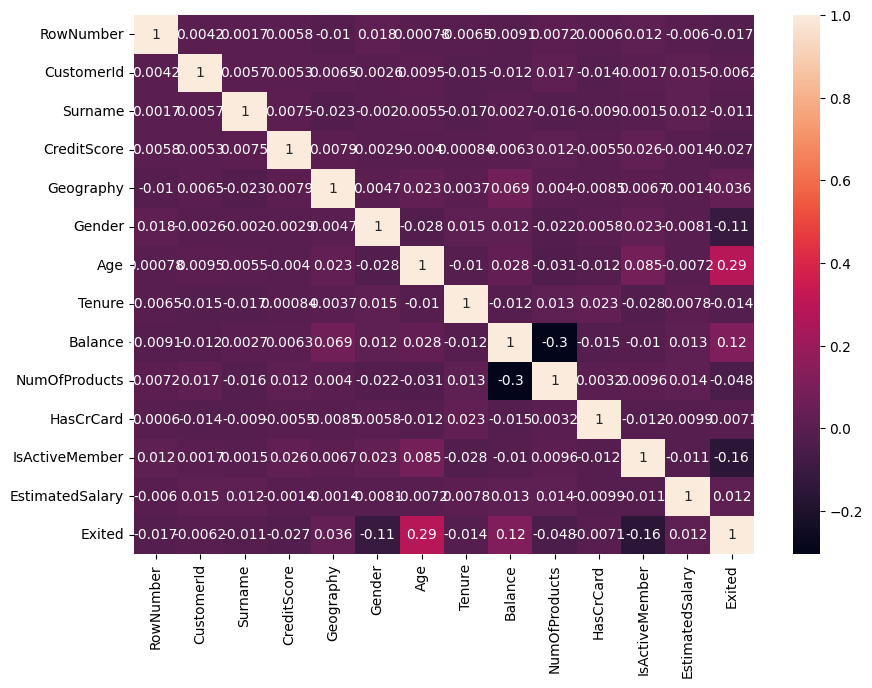

In [37]:
#checking for correlated features 
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

In [38]:
#dropping irrelevant features
df = df.drop('Surname',axis=1)
df = df.drop('RowNumber',axis=1)
df = df.drop('CustomerId',axis=1)

In [44]:
#seperating target variable
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.15,random_state =42)
num_features = X_train.shape[1]

In [45]:
X.shape[1]

10

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [47]:
model1 = Sequential([
    Input(shape=(10,)),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [48]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1408      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [49]:
model2 = Sequential([
    Input(shape=(10,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [50]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1408      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [51]:
model3 = Sequential([
    Input(shape=(num_features,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [52]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1408      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


In [54]:
#created array for the necessary hyperparameters which we'll iterate over to ease the comparison
models = [model1,model2,model3]
lr = [0.1,0.01,0.001]
epochs= [10,20,30]

In [55]:
def model_evaluation(models,lr,epochs):
    for model in models:
        for learning_rate in lr:
            optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
            model.compile(optimizer=optimizer,loss = 'binary_crossentropy',metrics = ['accuracy','Precision','Recall'])
            for epoch in epochs:
                history = model.fit(X_train,Y_train,epochs=epoch,batch_size = 32,validation_split= 0.15)
                training_loss = history.history['loss']
                training_acc = history.history['accuracy']
                training_precision = history.history['precision']
                training_recall = history.history['recall']
                validation_loss = history.history['val_loss']
                validation_acc = history.history['val_accuracy']
                validation_precision = history.history['val_precision']
                validation_recall = history.history['val_recall']
                e= range(0,epoch)
                plt.figure(figsize=(10, 6))
                plt.subplot(2, 2, 1)
                plt.plot(e, training_loss, label='Training Loss')
                plt.plot(e, validation_loss, label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
    
                plt.subplot(2, 2, 2)
                plt.plot(e, training_acc, label='Training Accuracy')
                plt.plot(e, validation_acc, label='Validation Accuracy')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
    
                plt.subplot(2, 2, 3)
                plt.plot(e, training_precision, label='Training Precision')
                plt.plot(e, validation_precision, label='Validation Precision')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
    
                plt.subplot(2, 2, 4)
                plt.plot(e, training_recall, label='Training Recall')
                plt.plot(e, validation_recall, label='Validation Recall')
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
    
                plt.tight_layout()
                plt.show()      

Epoch 1/10
226/226 [==============================] - 3s 5ms/step - loss: 2105820160.0000 - accuracy: 0.7916 - precision: 0.1714 - recall: 0.0040 - val_loss: 0.5063 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5077 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5063 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5063 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5063 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
226/226 [===================

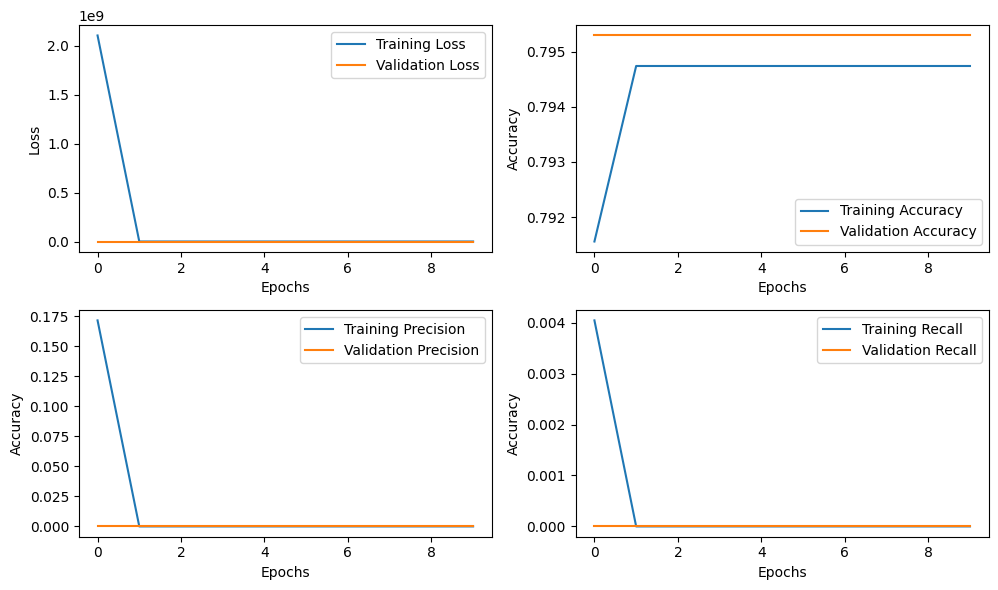

Epoch 1/20
226/226 [==============================] - 1s 5ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5065 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: 0.5077 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5062 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: 0.5077 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5062 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5064 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
226/226 [====================

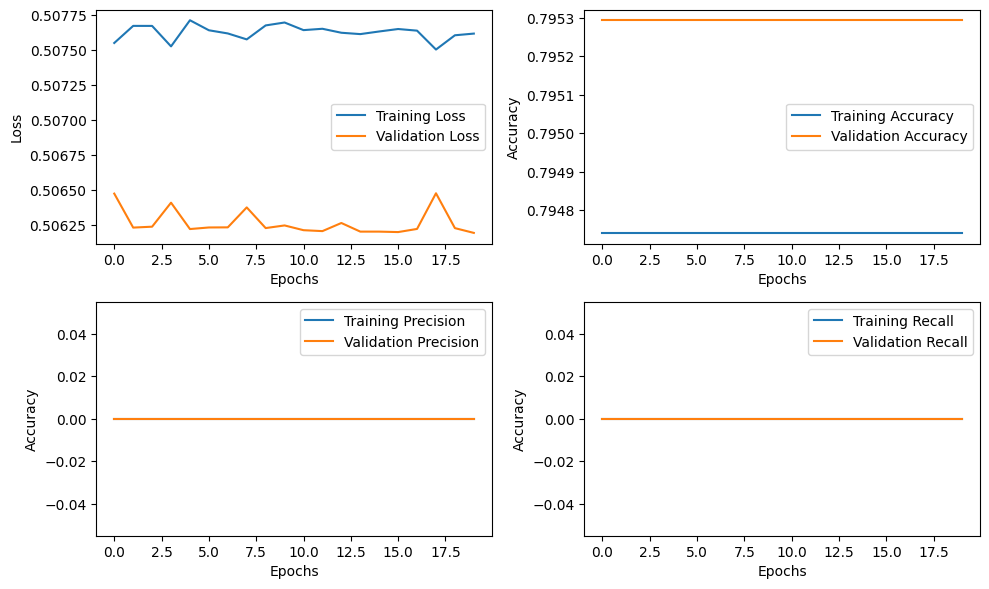

Epoch 1/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5077 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5062 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5068 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5079 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5077 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
226/226 [====================

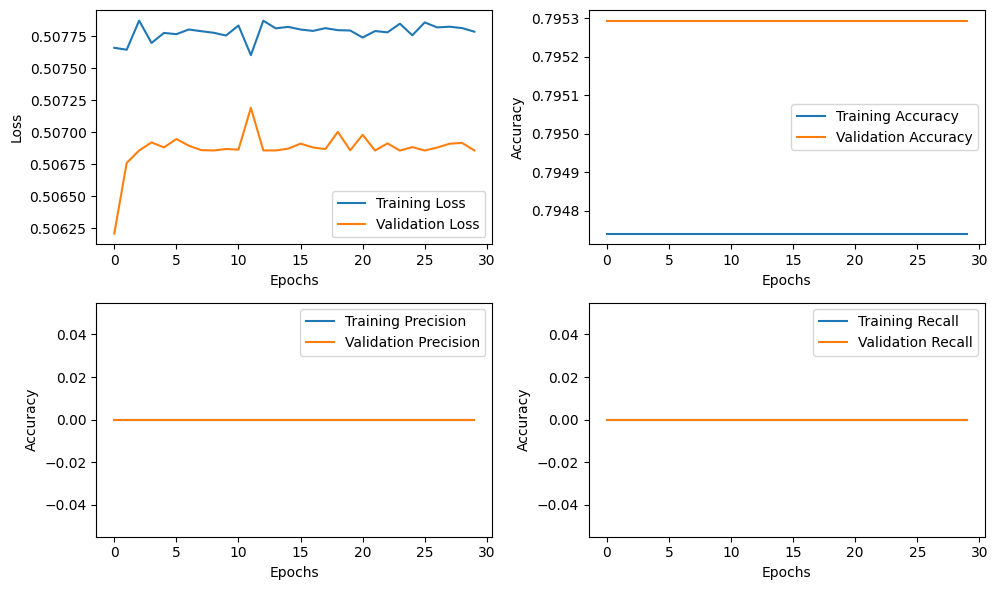

Epoch 1/10
226/226 [==============================] - 1s 5ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
226/226 [====================

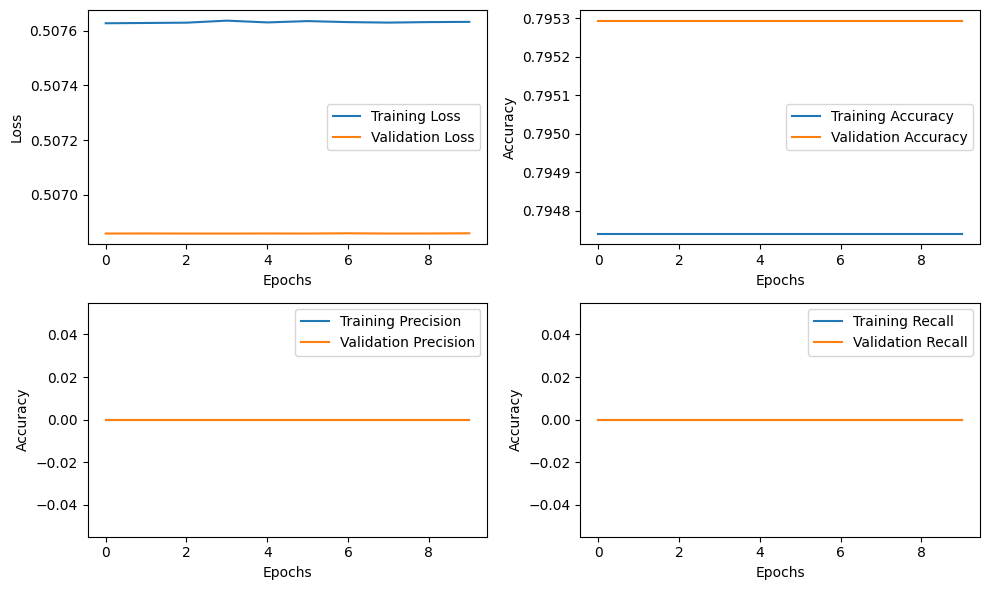

Epoch 1/20
226/226 [==============================] - 1s 5ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
226/226 [==============================] - 1s 5ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
226/226 [====================

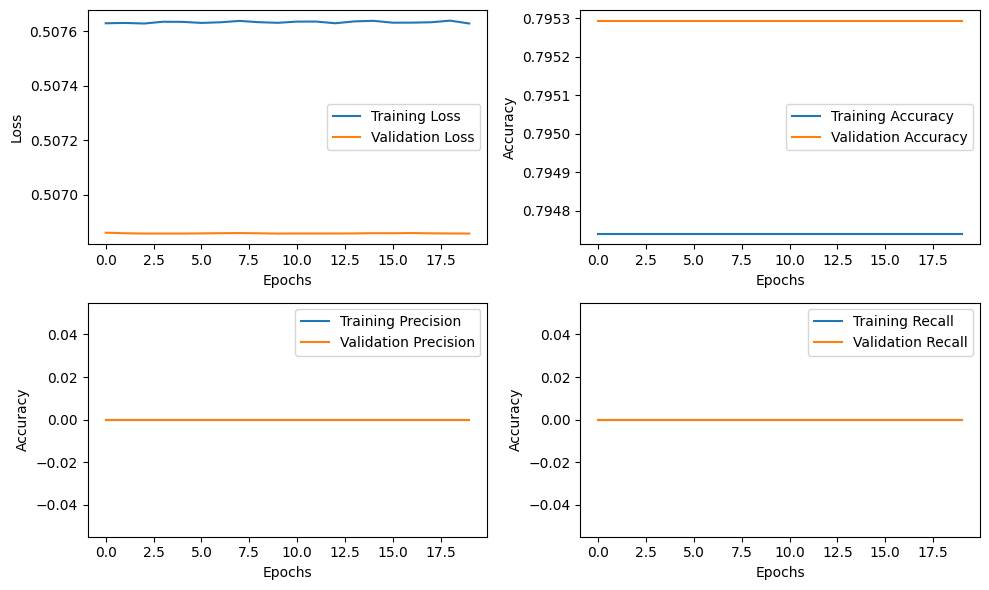

Epoch 1/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
226/226 [====================

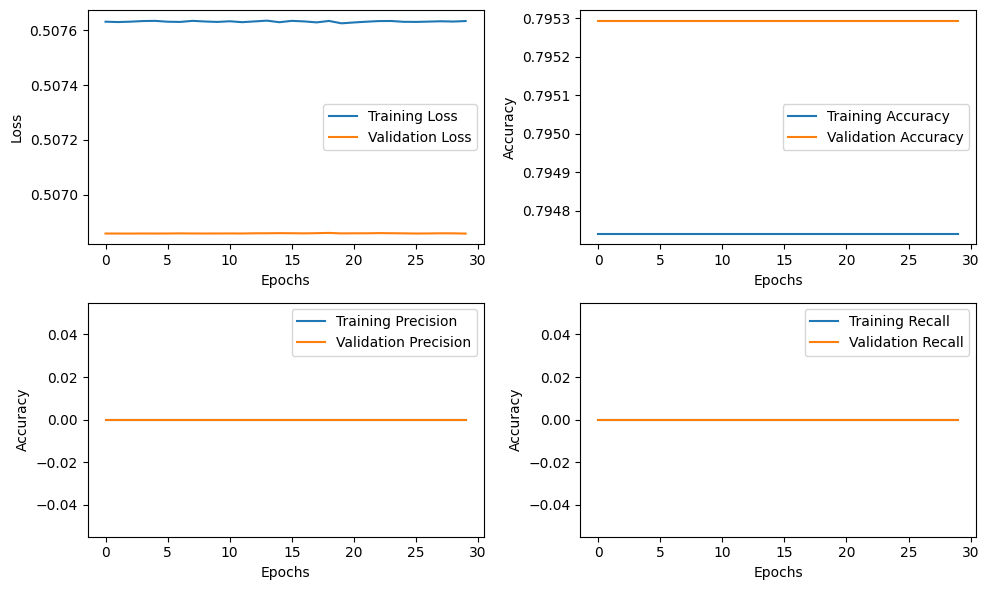

Epoch 1/10
226/226 [==============================] - 1s 5ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
226/226 [====================

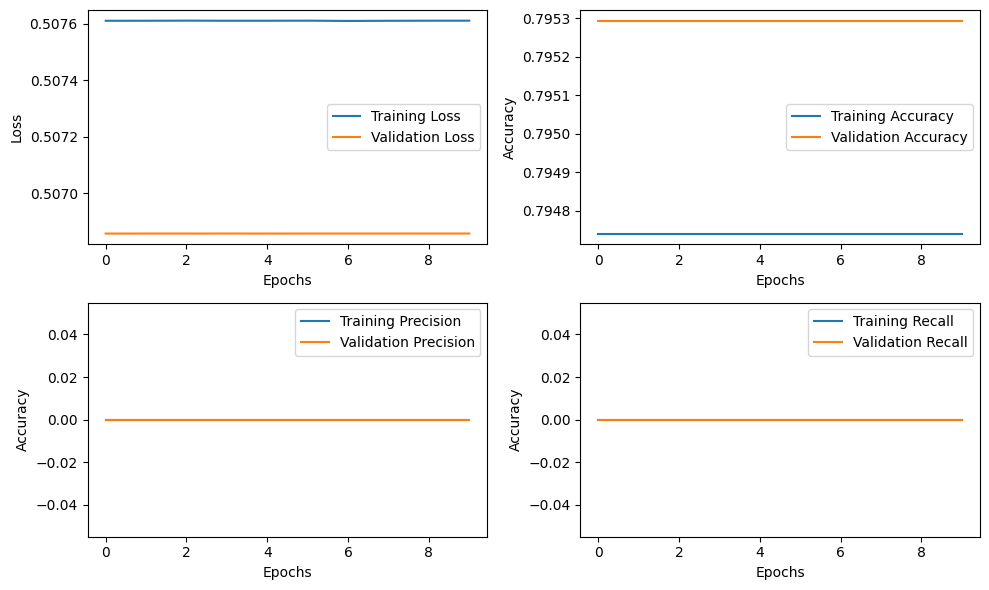

Epoch 1/20
226/226 [==============================] - 1s 5ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
226/226 [====================

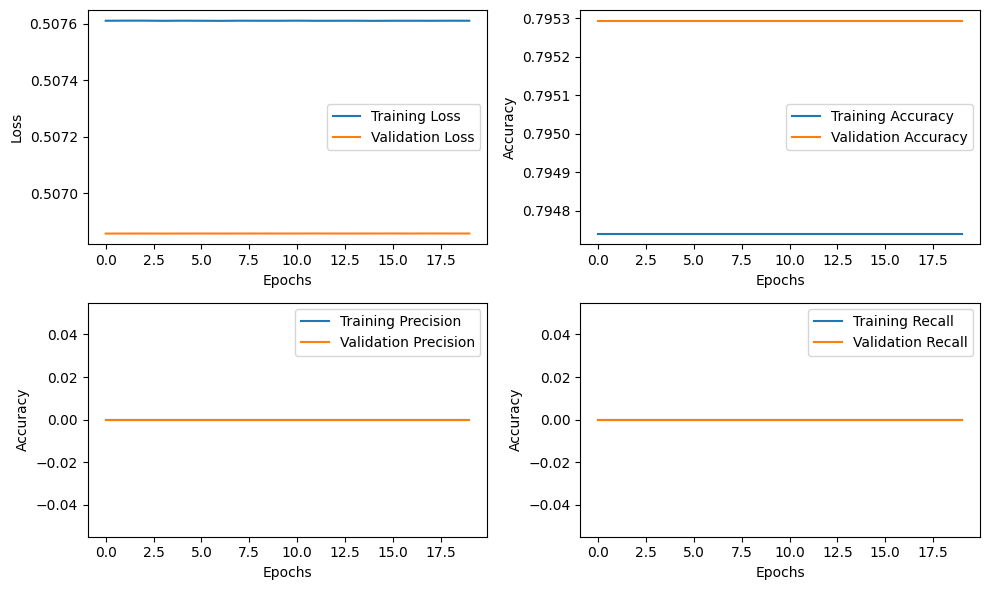

Epoch 1/30
226/226 [==============================] - 1s 5ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
226/226 [==============================] - 1s 5ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
226/226 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5069 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
226/226 [====================

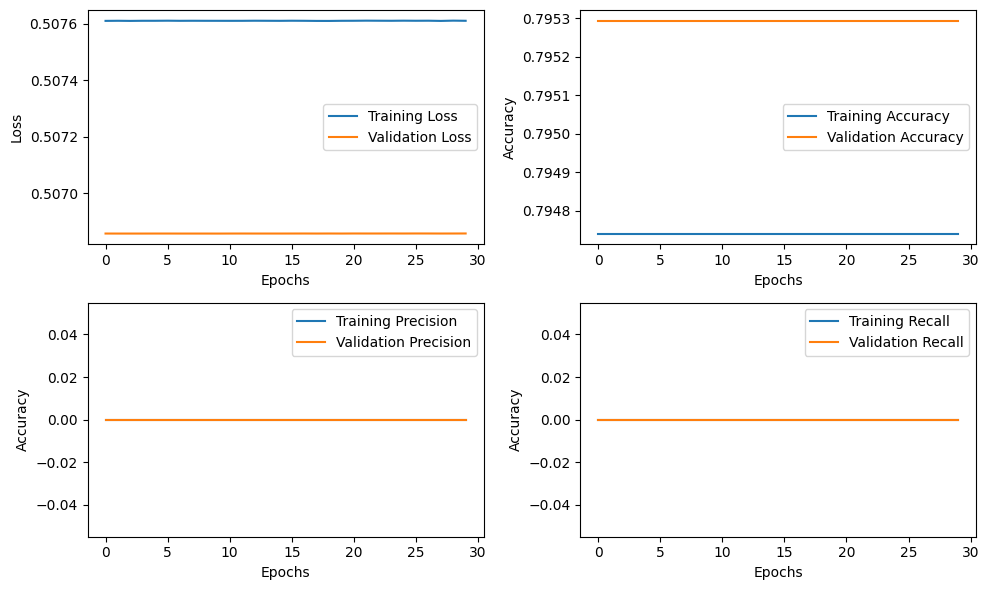

Epoch 1/10
226/226 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.7903 - precision: 0.1364 - recall: 0.0040 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
226/226 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
226/226 [==============================] - 1s 4ms/step - loss

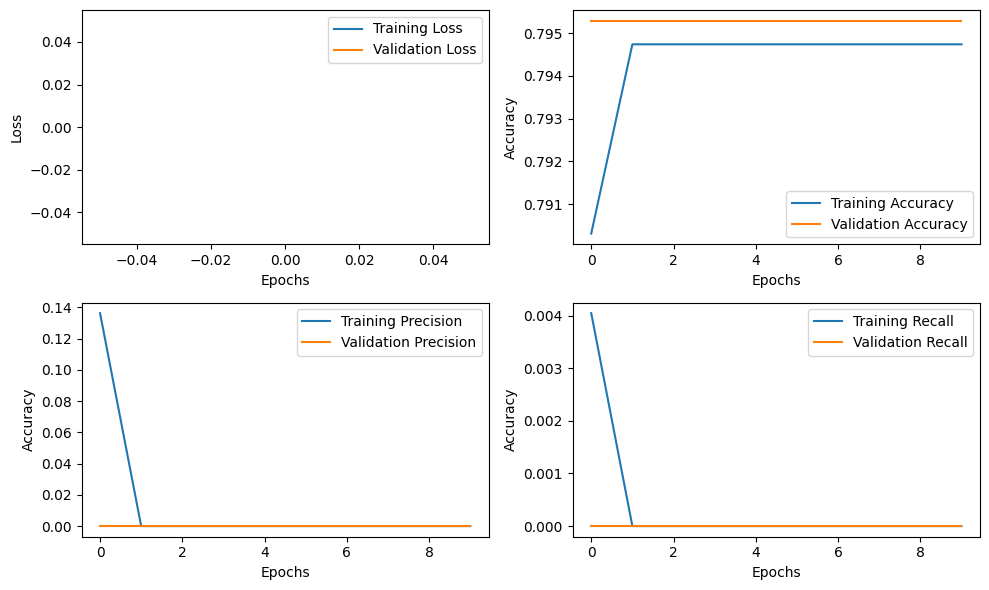

Epoch 1/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
226/226 [==============================] - 1s 4ms/ste

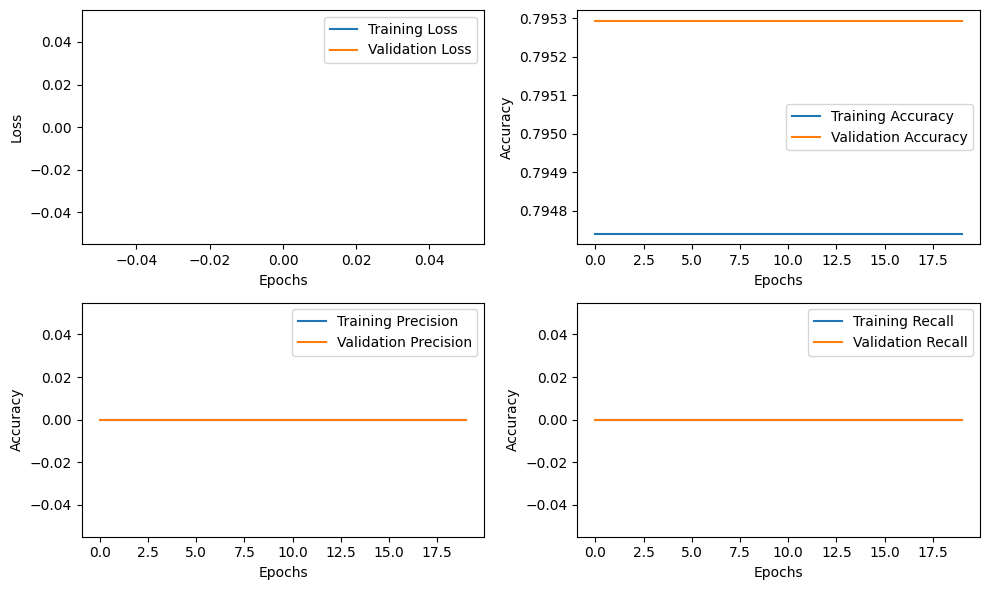

Epoch 1/30
226/226 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
226/226 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
226/226 [==============================] - 1s 4ms/ste

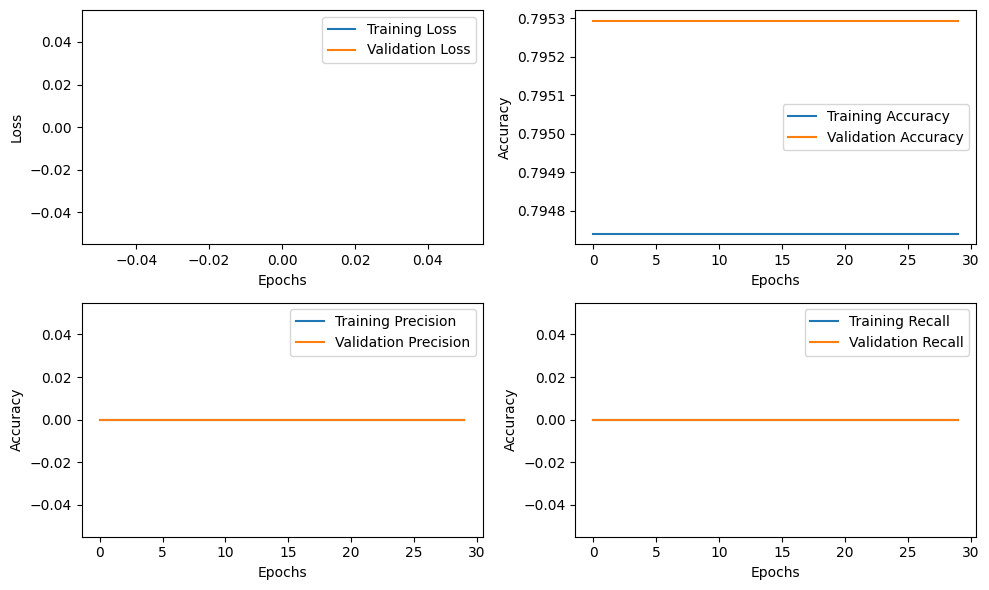

Epoch 1/10
226/226 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
 80/226 [=========>....................] - ETA: 0s - loss: nan - accuracy: 0.7918 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: 

In [56]:
model_evaluation(models,lr,epochs)